# MSDS 400 Fall 2020 Practice Final Solutions

<div class="alert alert-block alert-success"> <b>1.</b> Northwest Molded molds plastic handles which cost \$1.00 per handle to mold. The fixed cost to run the molding machine is \$3008 per week. If the company sells the handles for \$3.00 each, how many handles must be molded weekly to break even?</div>

In [3]:
# Individual unit costs
handle_moulding_cost = 1.0
handle_sales_price = 3.0

# Fixed weekly costs
weekly_fixed_costs = 3008.0

# Number of handles needed to break-even or cover fixed costs
break_even_total = round(weekly_fixed_costs/(handle_sales_price-handle_moulding_cost))

print("Number of handles to be molded weekly to break-even (or cover the fixed costs) = {}".format(break_even_total,"{:d}"))


Number of handles to be molded weekly to break-even (or cover the fixed costs) = 1504


<div class="alert alert-block alert-success"> <b>2.</b> For the following table of data:

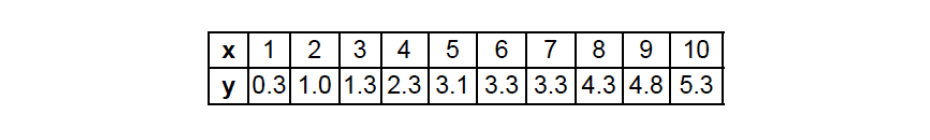
<br>**a.** Draw a scatterplot.</br>
<br>**b.** Calculate the correlation coefficient.</br>
<br>**c.** Calculate the least squares line and graph it on the scatterplot.</br>
<br>**d.** Predict the y-value when x is 11.</br>
</div>


 b. 
Option 1: Correlation Coefficient (corrcoef):  0.989
Option 2: Correlation Coefficient (pearsonr):  0.989

c.
y =  0.54 x  -0.09

 d. 
When x = 11.0, using linregress, we predict that y =  5.9
When x = 10.0, using polyfit, we predict that y =  5.9


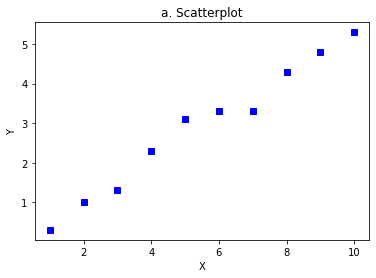

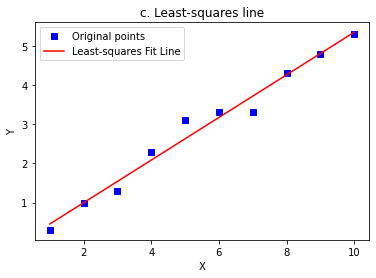

In [4]:
%matplotlib inline

# Packages we can use
from scipy.stats.stats import pearsonr
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

'''
a. Draw a scatterplot. 
Use numpy arrays to store x and y
'''
x = np.arange(1,11)
y = np.array([0.3,1.,1.3,2.3,3.1,3.3,3.3,4.3,4.8,5.3])

plt.figure()
plt.title("a. Scatterplot")
plt.plot(x, y, 'bs',label='Origial datapoints')
plt.xlabel('X')
plt.ylabel('Y')


'''
b. Calculate the correlation coefficient. 

Two options- using the corrcoef function from numpy or pearsonr function
'''

print("\n b. ")

corr_np = np.corrcoef(x, y)[0, 1]
corr_sci = pearsonr(x, y)[0]
print("Option 1: Correlation Coefficient (corrcoef): ",round(corr_np,3))
print("Option 2: Correlation Coefficient (pearsonr): ",round(corr_sci,3))

'''
c. Calculate the least squares line and graph it on the scatterplot. 
'''
'''
For deeper exploration of pyplot visit:
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot
'''

# For details of the following step see part (d) below
slope,intercept,rvalue,pvalue,stderr = st.linregress(x,y)

# Scatter plot of the various points and a least-squares fit line
plt.figure()
plt.title("c. Least-squares line")
plt.plot(x, y, 'bs',label='Original points')
plt.plot(x, slope*x + intercept, 'r-',label='Least-squares Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

print('\nc.')
print('y = ',round(slope,2),'x ',round(intercept,2))

'''
d. Predict the y-value when x is 11.

Two options - 
Option 1: Use the linear regression function in scipy.stats.
Option 2: Use numpy.polyfit

Pass in the parameters x and y to the lingress function of scipy.stats package 
The function returns 5 values: slope, intercept, rvalue, pvalue, stderr 

To keep things simple you are mostly concerned with the slope and intercept since
these can be used to determine the relationship between x and y
'''
print("\n d. ")

slope,intercept,rvalue,pvalue,stderr = st.linregress(x,y)

# We have slope and an intercept. That is enough to 'predict' the value between x and y
x_val = 11.0
predicted = slope*x_val + intercept
print('When x = 11.0, using linregress, we predict that y = ', round(predicted,1))

''' 
Option 2) This second option is really useful because you can use this to 
fit non-linear polynomials as well e.g. y = a*x**2 + b just by
specifying the 'degree' of the equation as the third parameter

For deeper exploration visit:
http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html 
'''

# pass x, y and a degree of 1 since we know there is a linear relationship
slope, intercept = np.polyfit(x, y, 1)

# c)
x_val = 11.0
polyfit_predicted = slope * x_val + intercept
print('When x = 10.0, using polyfit, we predict that y = ', round(polyfit_predicted,1))


3. Fill in all the stuff and use nitrogen








<div class="alert alert-block alert-success"> <b>4.</b> A basketball fieldhouse seats 15,000. Courtside seats cost \$8, endzone seats cost \$7, and balcony seats cost \$4. The total revenue for a sellout is \$78000. If half the courtside seats, half the balcony seats, and all the endzone seats are sold; then the total revenue is \$46,000. How many of each type of seat are there?</div>

<div class="alert alert-block alert-info"><b>Solution:</b> Let c be the maximum number of courtside seats available.
Let e be the maximum number of endzone seats available.
Let b be the maximum number of balcony seats available.

** Total number of seats ** <br/>
c + e + b = 15000

** Total revenue from sellout ** <br/>
8 c + 7 e + 4 b = 78000

** When revenue is \$46,000 ** <br/>
1/2 (8 c) + 7 e + 1/2 (4 b) = 46000 <br/>
=> 4 c + 7 e + 2 b = 46000
</div>





In [42]:
import numpy as np

# Set up the constraints and obtain the points of intersection
lhs = np.array([[1,1,1], [8,7,4], [4,7,2]])
rhs = np.array([15000,78000,46000])

# solve the three sets of equations 
seats = np.linalg.solve(lhs, rhs)

print("Number of courtside seats = {}".format(round(seats[0])))
print("Number of endzone seats = {}".format(round(seats[1])))
print("Number of balcony seats = {}".format(round(seats[2])))


Number of courtside seats = 3000.0
Number of endzone seats = 2000.0
Number of balcony seats = 10000.0


<div class="alert alert-block alert-success"> <b>5.</b> An airline with two types of airplanes, P1 and P2, has contracted with a tour group to provide transportation for a minimum of 400 first class, 750 tourist class, and 1500 economy class passengers. For a certain trip, airplane P1 costs \$10,000 to operate and can accommodate 20 first class, 50 tourist class, and 110 economy class passengers. Airplane P2 costs \$8500
to operate and can accommodate 18 first class, 30 tourist class and 44 economy class passengers. How many of each type of airplane should be used in order to minimize the operating cost?</div>

<div class="alert alert-block alert-info">
    <b>Solution:</b>
Let x be the number of P1 airplanes<br>
Let x be the number of P2 airplanes<br>

Operating cost to be minimized = 10000 x + 8500 y <br>
Subject to:
* 20 x + 18 y ≥ 400  
* 50 x  + 30 y ≥ 750
* 110 x  + 44 y ≥ 1500
* x ≥ 0, y ≥ 0 <br>
</div>

In [43]:
# Set up the constraints and obtain the corner points
import numpy as np

a1 = np.array([[20,18], [50,30]])
b1 = np.array([400,750])

# solve the two sets of equations at a time to get points of intersection of the lines
c1 = np.linalg.solve(a1, b1)
print(c1)

# Second pair of corner points
a2 = np.array([[50,30], [110,44]])
b2 = np.array([750,1500])
c2 = np.linalg.solve(a2, b2)
print(c2)

# Third pair of corner points
a3 = np.array([[20,18], [110,44]])
b3 = np.array([400,1500])
c3 = np.linalg.solve(a3, b3)
print(c3)

[ 5.         16.66666667]
[10.90909091  6.81818182]
[ 8.54545455 12.72727273]


In [44]:
# Use the corner points of the rounded values and compute dot product to determine the minimum value 
x= [5., 11., 9.]
y= [17., 7., 13.]

obj= np.matrix([10000,8500])
obj= np.transpose(obj)
corners= np.matrix([x,y])
corners= np.transpose(corners)
result= np.dot(corners,obj)

# Check whether constraints are satisfied
constraints = np.array([[20,18], [50,30],[110,44]])
constraints_dot = np.dot(corners,constraints.T)

# Print corner points 
print("Corner points: \n",corners)

# Verify whether constraints are satisfied at each corner point
print("Value of each constraint at the corner points : \n",constraints_dot)

# For (11,7) the first constraint is not satisfied since 20(11) + 18(7) or 346 < 400
# So we pick the next set of corner points that produce the minimum
print ("Value of Objective Function at Each Corner Point", result)

print ("Number of P1 airplanes = {}".format(x[2]))
print ("Number of P2 airplanes = {}".format(y[2]))

Corner points: 
 [[ 5. 17.]
 [11.  7.]
 [ 9. 13.]]
Value of each constraint at the corner points : 
 [[ 406.  760. 1298.]
 [ 346.  760. 1518.]
 [ 414.  840. 1562.]]
Value of Objective Function at Each Corner Point [[194500.]
 [169500.]
 [200500.]]
Number of P1 airplanes = 9.0
Number of P2 airplanes = 13.0


In [45]:
constraints = np.array([[20,18], [50,30],[110,44]])

np.dot(corners,constraints.T).T

matrix([[ 406.,  346.,  414.],
        [ 760.,  760.,  840.],
        [1298., 1518., 1562.]])

<div class="alert alert-block alert-success">
    <b>6.</b> As part of a weight reduction program, a man designs a monthly exercise program consisting of bicycling, jogging, and
swimming. He would like to exercise at most 36 hours, devote at most 4 hours to swimming, and jog for no more than the
total number of hours bicycling and swimming. The calories burned by this person per hour by bicycling, jogging, and
swimming are 200, 445, and 255, respectively. How many hours should be allotted to each activity to maximize the number
of calories burned? What is the maximum number of calories he will burn? (Hint: Write the constraint involving jogging in the
form 0.)
</div>

<div class="alert alert-block alert-info">
<b>Solution:</b>
Let x1 be the number of hours spent bicycling, let x2 be the number of hours spent jogging, and let x3 be the number of
hours spent swimming. What is the objective function?
Objective function = 200 x1 + 445 x2  <br>
Subject to:
* x1 + x2 + x3 <= 36  
* x2 <= 4
* x2 <= x1 + x3
* x ≥ 0, y ≥ 0 
<br>
</div>

In [46]:
# Install the pulp package
!pip install pulp

In [47]:
from pulp import LpVariable, LpProblem, LpMaximize, GLPK, LpStatus, value, LpMinimize

model = LpProblem("problem", LpMaximize)
x1 = LpVariable("x1", 0, None) # x1 >= 0
x2 = LpVariable("x2", 0, None) # x2 >= 0
x3 = LpVariable("x3", 0, None) # x3 >= 0

model += x1 + x2 + x3 <= 36
model += x3 <= 4
model += x2 <= x1 + x3

model += 200*x1 + 445*x2 + 255*x3

# solve the problem
status = model.solve()
LpStatus[status]

print("To maximize the number of calories burned, the man should spend {} hours bicycling, {} hours jogging, and {} hours swimming.".format(value(x1),value(x2),value(x3)))

maximum_calories = 200 * value(x1) + 445 * value(x2) + 255 * value(x3) 

print('\nHe will burn a maximum of {} calories.'.format(maximum_calories))

To maximize the number of calories burned, the man should spend 14.0 hours bicycling, 18.0 hours jogging, and 4.0 hours swimming.

He will burn a maximum of 11830.0 calories.


<div class="alert alert-block alert-success">
<b>7.</b> A company's lawn seed mixtures contain three types of seeds: bluegrass, rye, and Bermuda. The costs per pound of the
three types are 12 cents, 6 cents, and 6 cents, respectively. In each batch there must be at least 20% bluegrass seed and
the amount of must be two-thirds the amount of Bermuda. To fill current orders the company must make atleast 9000 pounds of the mixture. How much of each kind of seed should be used to minimize cost?
    </div>

<div class="alert alert-block alert-info">
<b>Solution:</b>Let x be the pounds of bluegrass seed <br>
Let y be the pounds of rye seed <br>
Let z be the pounds of Bermuda seed <br>

Cost to be minimized = 0.12 x + 0.16 y + 0.06 z <br>
Subject to:
* x ≥ 0.20(x + y + z) 
* y ≥ 2/3z
* x + y + z ≥ 9000 
* x ≥ 0 y ≥ 0 z ≥ 0 
</div>

In [48]:
from pulp import LpVariable, LpProblem, LpMaximize, GLPK, LpStatus, value, LpMinimize

model = LpProblem("problem", LpMinimize)
x = LpVariable("x", 0, None) # x >= 0
y = LpVariable("y", 0, None) # y >= 0
z = LpVariable("z", 0, None) # z >= 0

model += 0.80*x - 0.20*y - 0.20*z >= 0
model += y - 2/3*z >= 0


model += x + y + z >= 9000

model += 0.12*x + 0.16*y + 0.06*z

# solve the problem
status = model.solve()
LpStatus[status]

minimum_cost = 0.12 * value(x) + 0.16 * value(y) + 0.06 * value(z) 

print("The minimum cost of ${} occurs with a mixture of {} pounds of bluegrass seed, {} pounds of rye seed, and {} pounds of Bermuda seed.".format(minimum_cost,value(x),value(y),value(z)))


The minimum cost of $936.0 occurs with a mixture of 1800.0 pounds of bluegrass seed, 2880.0 pounds of rye seed, and 4320.0 pounds of Bermuda seed.


<div class="alert alert-block alert-success">
<b>10.</b> The projected population of a certain ethnic group(in millions) can be approximated by p(t) = 35.03$(1.013)^{t}$ where t=0
corresponds to 2000 and 0 ≤ t ≤ 50
<br/>
a. Estimate the population of this group for the year 2010.
<br/>
b. What is the instantaneous rate of change of the population when t = 10?
    </div>

In [49]:
import matplotlib.pyplot 
from matplotlib.pyplot import *
import numpy 
from numpy import *

# Age distribution Function

def f(x):
    f = 35.03 * (1.013**x) 
    return f

population_in_2010 = round(f(10),3)

print ("The population in 2010 is {} million people.".format(population_in_2010,'%d'))


# A general function for calculating the slope between two points: x and x+delta. 
# See Lial Section 11.3 dealing with instantaneous rates of change.
def der(x, delta):
    delta = float(delta)
    if delta < 0.0000001:
        print('Value chosen for delta is too small.')
        return 1 / delta
    else:
        slope = (f(x + delta) - f(x)) / delta 
        return slope

# The following statements initialize variables for computation.
point = 1.0  

rate_of_change=round(der(10,0.000001),3)

print("The instantaneous rate of change in the population when t=10 is {} million people per year ".format(rate_of_change,'%d'))


The population in 2010 is 39.86 million people.
The instantaneous rate of change in the population when t=10 is 0.515 million people per year 


<div class="alert alert-block alert-success">
<b>11.</b> Since the creation of a social program, the percent of persons 65 years and over with a family below the poverty level has declined. The percent can be approximated by the function 𝑃(𝑡) = 30.95 − 5.79 ln 𝑡, where 𝑡 is the number of years since 1965.

a. Find the percent of persons 65 years and over with family income below the poverty level and the rate of change in 1970.

b. Find the percent of persons 65 years and over with family income below the poverty level and the rate of change in 1990.

c. Find the percent of persons 65 years and over with family income below the poverty level and the rate of change in 2010.

d. What happens to the rate of change over time?
</div>

In [7]:
import sympy

t = sympy.Symbol('t')

f = 30.95 - 5.79 * sympy.ln(t)
f_diff = f.diff(t)

f_l = sympy.lambdify(t, f)
f_diff_l = sympy.lambdify(t, f_diff)

base = 1965
years = [1970, 1990, 2010]

for year in years:
    pct = f_l(year-base)
    rate = f_diff_l(year-base)
    print(f"In {year} the percent of persons over 65 in poverty was {pct:.03} and the rate of change was {rate:.03}")


In 1970 the percent of persons over 65 in poverty was 21.6 and the rate of change was -1.16
In 1990 the percent of persons over 65 in poverty was 12.3 and the rate of change was -0.232
In 2010 the percent of persons over 65 in poverty was 8.91 and the rate of change was -0.129


<div class="alert alert-block alert-success">
<b>12.</b>
The percent of concentration of a certain drug in the bloodstream 𝑥 hours after the drug is administered is given by
    $$𝐾(𝑥) = 3𝑥 / 𝑥2 +16$$
a. Find the time at which the concentration is a maximum.

b. Find the maximum concentration.
</div>

In [12]:
import sympy
x = sympy.Symbol('x')
k = 3*x / (x**2 + 16)

k_l = sympy.lambdify(x, k)
k_diff = k.diff(x)

roots = sympy.solveset(sympy.Eq(k_diff, 0), x)
print(f"The extrema for this equation are {roots}")

for root in roots:
    val_at_root = k_l(root)
    print(f"After {root} hours the percent concentration is {val_at_root}")

print("We can ignore the -4 hour mark as it is nonsensical to the problem. So the only root that is valid is 4 hours")

The extrema for this equation are {-4, 4}
After -4 hours the percent concentration is -3/8
After 4 hours the percent concentration is 3/8


<div class="alert alert-block alert-success">
    <b>13.</b> A company sells square carpets for $7 per square foot. It has a simplified manufacturing process for which all the carpets each week must be the same size, and the length must be a multiple of a half foot. It has found that it can sell 200 carpets in a week when the carpets are 2 ft by 2 ft, which is the minimum size. Beyond this, for each additional foot of length and width, the number sold goes down by 3.

a. Write the equation for the revenue, 𝑅, the company will earn as a function of the length, 𝑥, of the carpet squares sold.

b. What size carpets should the company sell to maximize its weekly revenue?

c. What is the maximum weekly revenue?
</div>

In [24]:

import sympy

x = sympy.Symbol('x')
r = -21 * x**3 + 1442 * x**2

r_l = sympy.lambdify(x, r)
r_diff = r.diff(x)

roots = sympy.solveset(sympy.Eq(r_diff, 0), x)
print(f"The extrema for this equation are {roots}")

for root in roots:
    closest_half_foot = round(root * 2) / 2 
    print(f"The closest half foot to {sympy.N(root)} is {closest_half_foot}")
    val_at_root = r_l(closest_half_foot)
    print(f"Producing a carpet of {closest_half_foot} length gives revenue of ${sympy.N(val_at_root)}")

print("We can ignore the 0 length production s it is nonsensical to the problem. So the only root that is valid is 4 hours")

The extrema for this equation are {0, 412/9}
The closest half foot to 0 is 0.0
Producing a carpet of 0.0 length gives revenue of $0
The closest half foot to 45.7777777777778 is 46.0
Producing a carpet of 46.0 length gives revenue of $1007216.00000000
We can ignore the 0 length production s it is nonsensical to the problem. So the only root that is valid is 4 hours


<div class="alert alert-block alert-success">
<b>15.</b> An oil tanker is leaking oil at a rate given in barrels per hour by the function shown below, where t is the time in hours after
the tanker hits a hidden rock (when t = 0). Complete parts (a) and (b).
$$L′(t) =
72 ln (t + 1)/
t + 1$$
<br>(a) Find the total number of barrels that the ship will leak on the first day.
<br>(b) Find the total number of barrels that the ship will leak on the second day.
</div>

In [50]:
# Growth Function

import math

def f(t):
    f = 72*math.log(t+1)/(t+1)
    return f

# Integrate is a general numerical integration function.  It requires
# an interval [a,b] and n = the number of subintervals used for integration.
# Integrate uses the function defined as f above.  For details refer
# to Lial Section 15.3.

def integrate(a,b,n):
    sum = 0.0
    delta = (b-a)/n
    i = 0
    while i < n:
        sum = sum + delta*(f(a+delta*(i+1))+f(a+delta*i))/2
        i = i+1
    return sum

# Barrels leaked on first day 
b = 24.0
a = 0.0
n = 100

first_day_leak = round(integrate(a,b,n),3)

print ("The total number of barrels that the ship will leak on the first day = {:.0f}".format(first_day_leak))

# Barrels leaked on second day 

b = 48.0
a = 24.0
n = 100

second_day_leak = round(integrate(a,b,n),3)

print ("The total number of barrels that the ship will leak on the second day = {:.0f}".format(second_day_leak))

The total number of barrels that the ship will leak on the first day = 373
The total number of barrels that the ship will leak on the second day = 172


<div class="alert alert-block alert-success">
    <b>17.</b> The total revenue (in hundreds of dollars) from the sale of 𝑥 spas and 𝑦 solar heaters is approximated by

𝑅(𝑥,𝑦)=14+278𝑥+206𝑦−7𝑥2 −4𝑦2 −6𝑥𝑦.

a. Find 𝑅𝑥𝑥, 𝑅𝑦𝑦, and 𝑅𝑥𝑦.

b. Find the number of each that should be sold to produce maximum revenue.

c. Find the maximum revenue.
</div>

In [32]:
import sympy

x, y = sympy.symbols('x, y')
r = 14 + 278*x + 206*y - 7*x**2 - 4*y**2 - 6*x*y

rx = r.diff(x)
ry = r.diff(y)

rxx = rx.diff(x)
ryy = ry.diff(y)

rxy = rx.diff(y)

print(f"Rxx is {rxx}")
print(f"Ryy is {ryy}")
print(f"Rxy is {rxy}")

results = sympy.linsolve([rx, ry], x, y)

print(f"The x and y value for critical points are {results}")

r_l = sympy.lambdify([x, y], r)

for res in results:
    print(f"The revenue at the critical point of {res} is ${100 * r_l(res[0], res[1])}")

Rxx is -14
Ryy is -8
Rxy is -6
The x and y value for critical points are {(13, 16)}
The revenue at the critical point of (13, 16) is $346900
